# **Predictive Analytics - Dicoding | Assignment**

## **1. Import Library and Data**

Importing libraries from Google Colab and importing data from [GitHub](https://raw.githubusercontent.com/danalvr/MLT-Assignment-Dicoding/main/Predictive%20Analytics/data/Housing.csv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/danalvr/MLT-Assignment-Dicoding/main/Predictive%20Analytics/data/Housing.csv'
house_df = pd.read_csv(url)
house_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## **2. Exploratory Data Analysis**

### 2.1 Variabel Description

Check each variable contained in the dataset
and apply data assessment.

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
house_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
print("Total duplicate: ", house_df.duplicated().sum())

Total duplicate:  0


In [7]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 2.2 Analysis and Visualization

#### 2.2.1 Univariate Analysis

Carry out data analysis using the univariate method by dividing it into 2 parts, namely categorical features and numerical features.

A. Categorical Features

In [8]:
house_categorical_features = house_df.select_dtypes(include='object').columns.to_list()
print(house_categorical_features)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [9]:
for col in house_categorical_features:
  count = house_df[col].value_counts()
  percent = 100*house_df[col].value_counts(normalize=True)
  df = pd.DataFrame({'Total sample':count, 'percentation':percent.round(1)})
  print('Feature: ', col)
  print(df, '\n\n')

Feature:  mainroad
     Total sample  percentation
yes           468          85.9
no             77          14.1 


Feature:  guestroom
     Total sample  percentation
no            448          82.2
yes            97          17.8 


Feature:  basement
     Total sample  percentation
no            354          65.0
yes           191          35.0 


Feature:  hotwaterheating
     Total sample  percentation
no            520          95.4
yes            25           4.6 


Feature:  airconditioning
     Total sample  percentation
no            373          68.4
yes           172          31.6 


Feature:  prefarea
     Total sample  percentation
no            417          76.5
yes           128          23.5 


Feature:  furnishingstatus
                Total sample  percentation
semi-furnished           227          41.7
unfurnished              178          32.7
furnished                140          25.7 




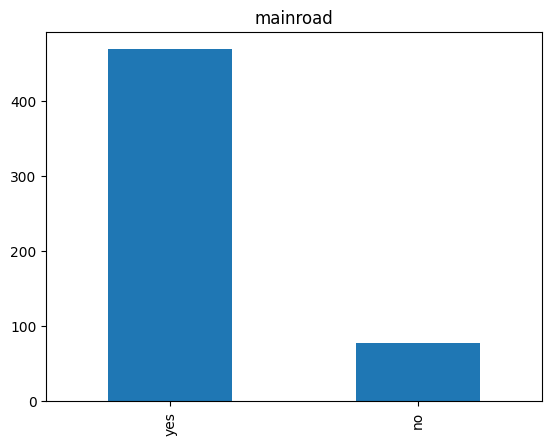

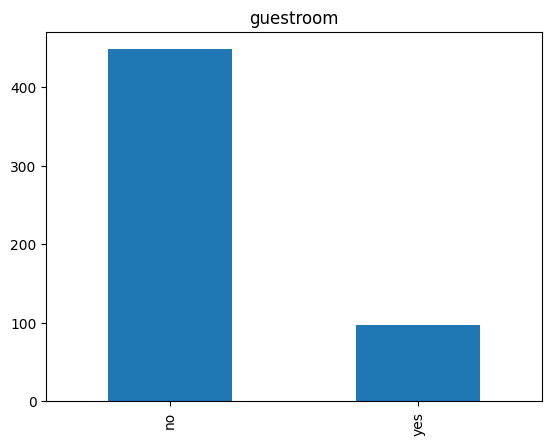

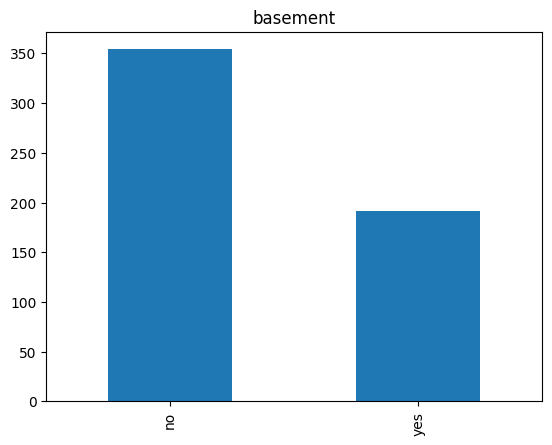

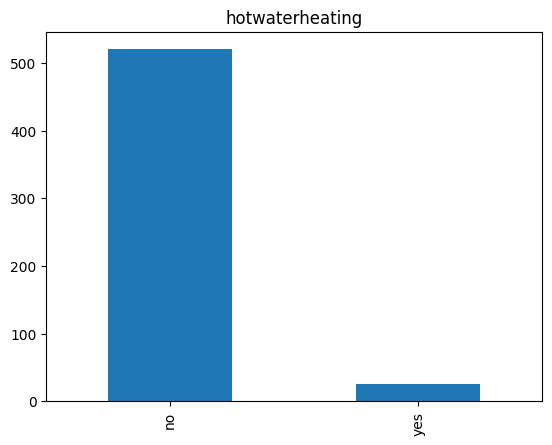

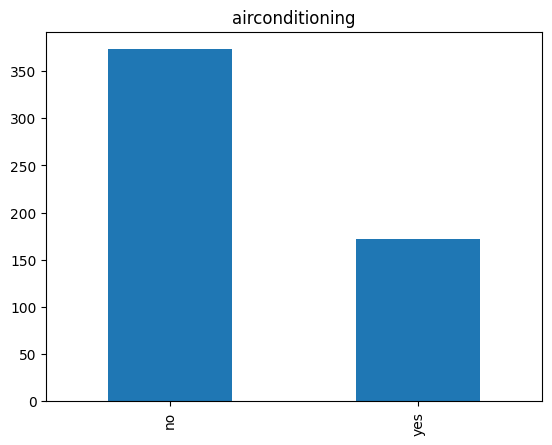

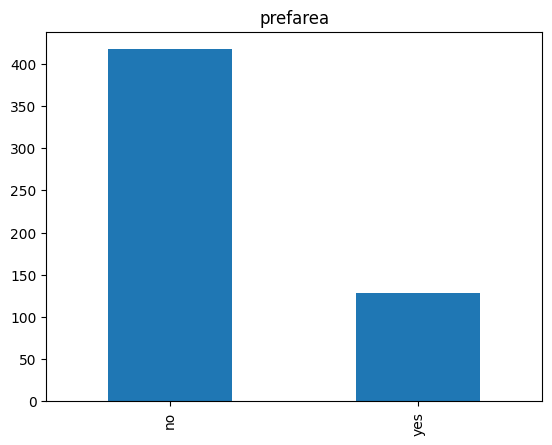

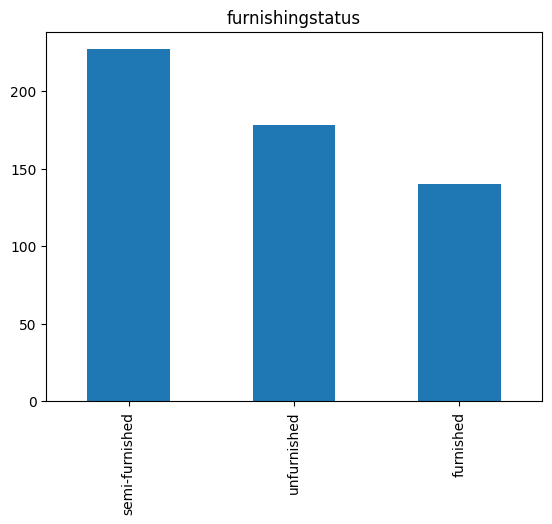

In [10]:
for col in house_categorical_features:
  count = house_df[col].value_counts()
  percent = 100*house_df[col].value_counts(normalize=True)
  df = pd.DataFrame({'Total sample':count, 'percentation':percent.round(1)})
  count.plot(kind='bar', title=col);
  plt.show()
  print('\n')

B. Numerical Features

In [11]:
house_numerical_features = house_df.select_dtypes(exclude=['object']).columns.to_list()
print(house_numerical_features)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


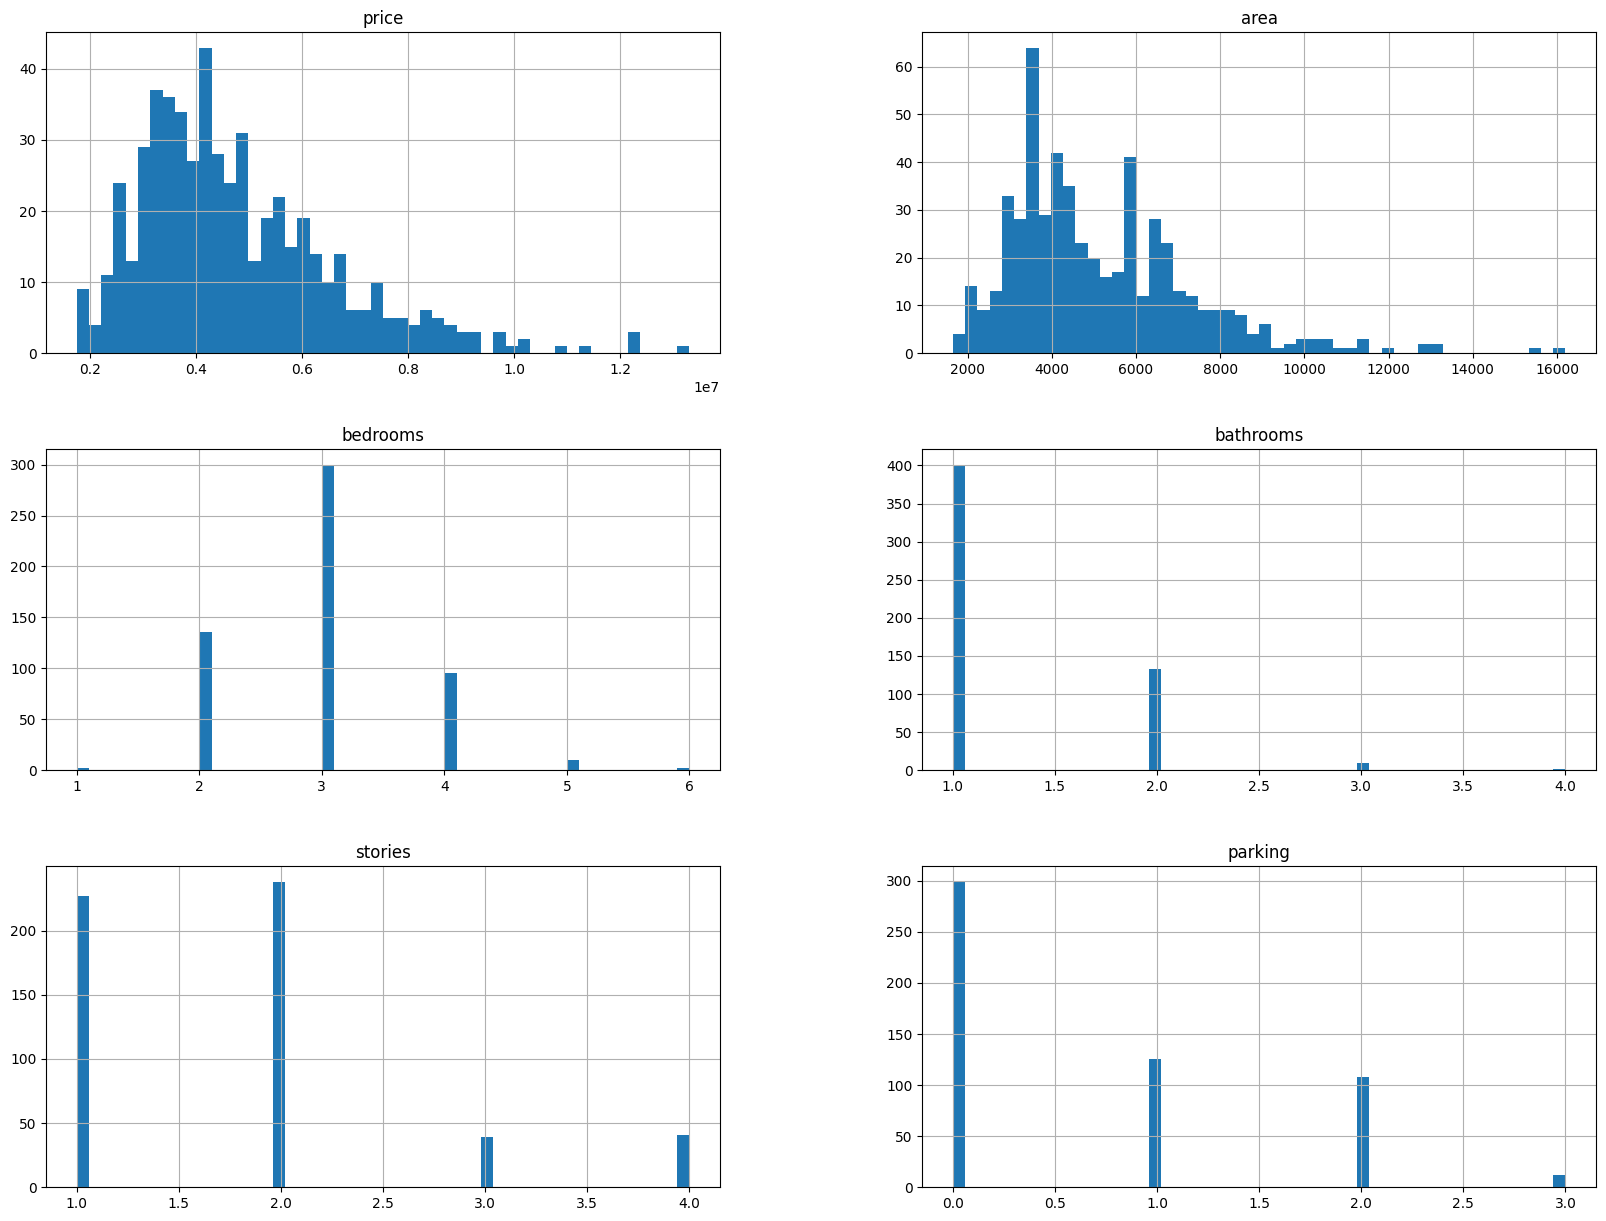

In [12]:
house_df.hist(bins=50, figsize=(20,15))
plt.show()

#### 2.2.2 Multivariate Analysis

Carry out data analysis using the multivariate method by dividing it into 2 parts, namely categorical features relative to price and numerical features.

A. Categorical Features Relative to Price

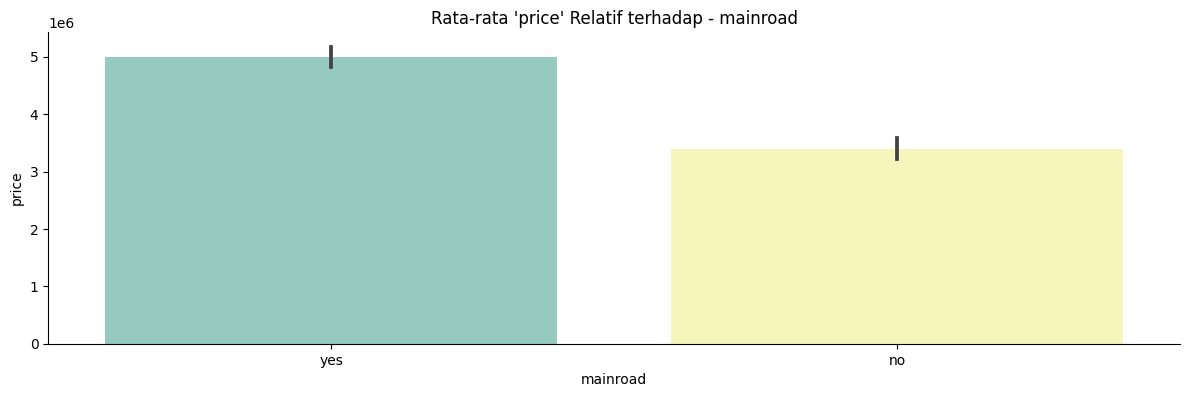

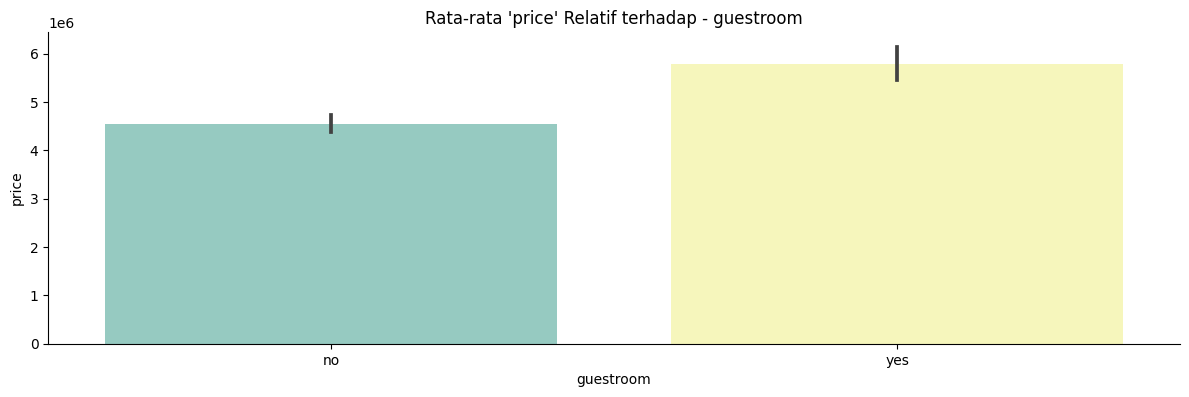

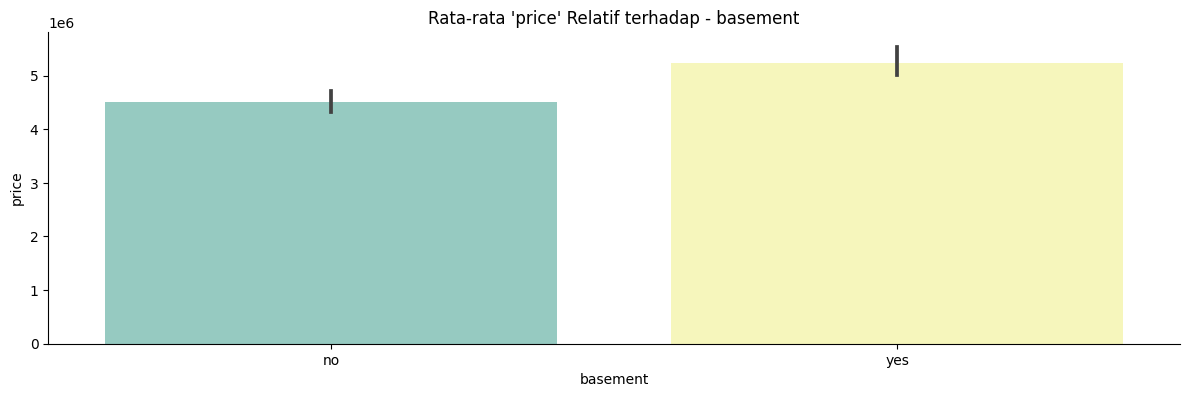

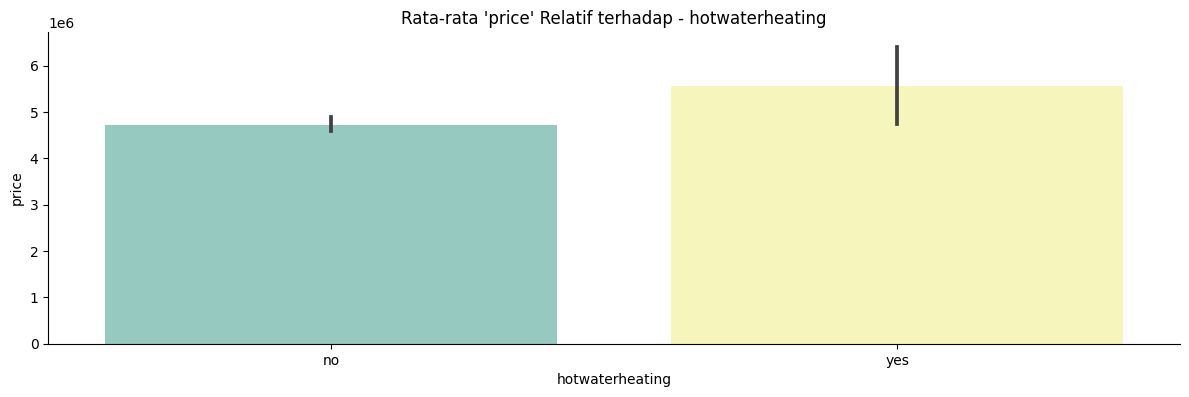

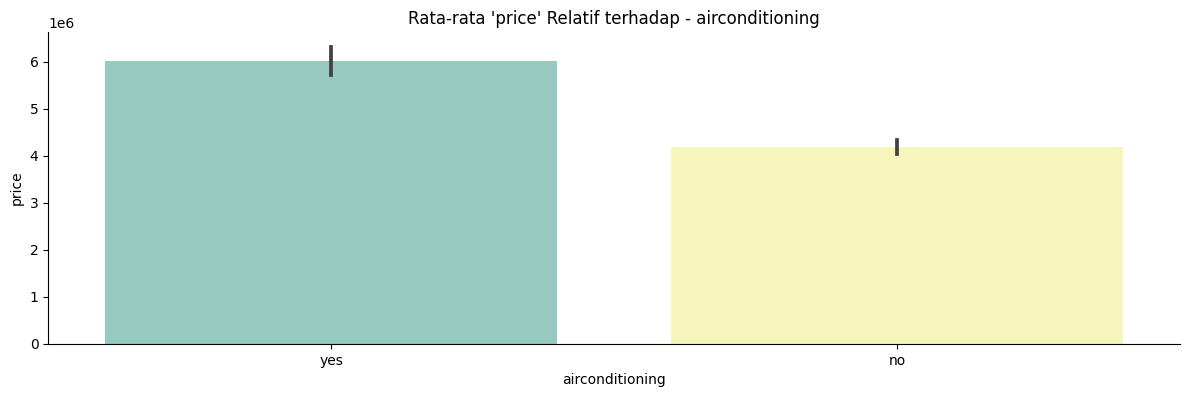

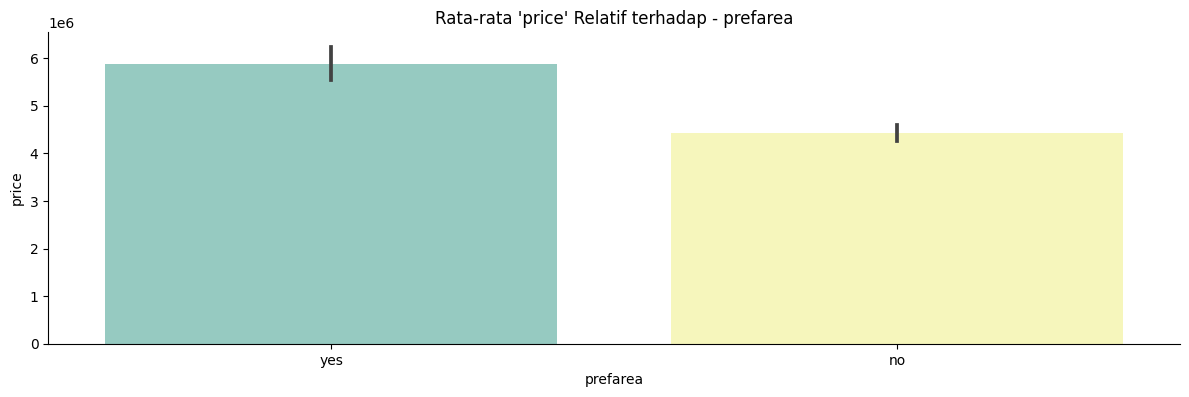

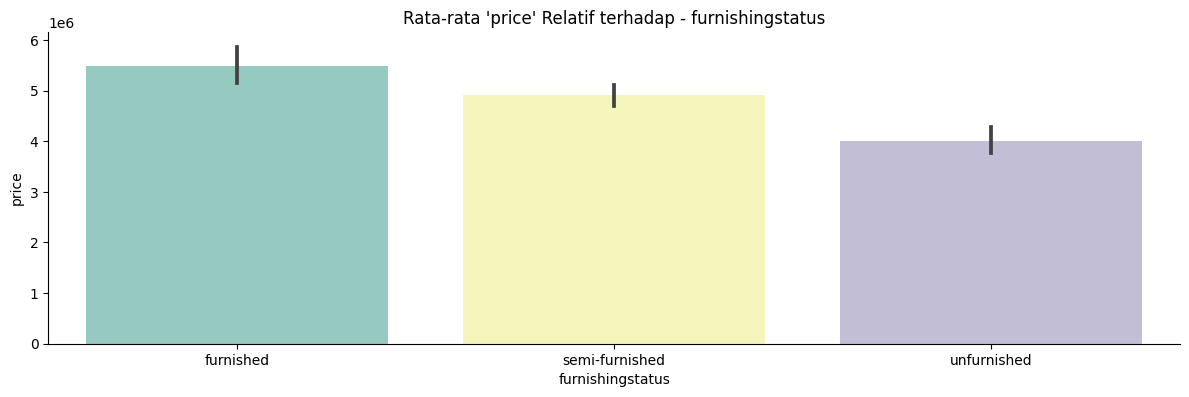

In [13]:
for col in house_categorical_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house_df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

B. Numerical Features

<ipython-input-14-41c2928ec7cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

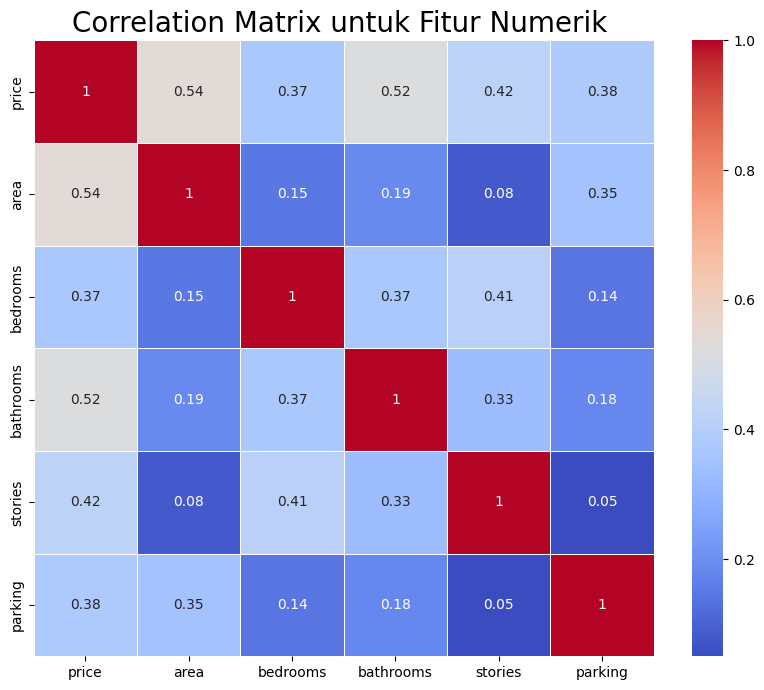

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## **3. Data Preparation**

### 3.1 Encoding Category Feature

Perform encoding techniques on category features to provide a more appropriate representation in numerical form.

In [15]:
from sklearn.preprocessing import  OneHotEncoder

for col in house_categorical_features:
  house_df = pd.concat([house_df, pd.get_dummies(house_df[col], prefix=col)], axis=1)
  house_df.drop(col, axis=1, inplace=True)

house_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


### 3.2 Principal Component Analysis

Applying PCA techniques to reduce features in the dataset.

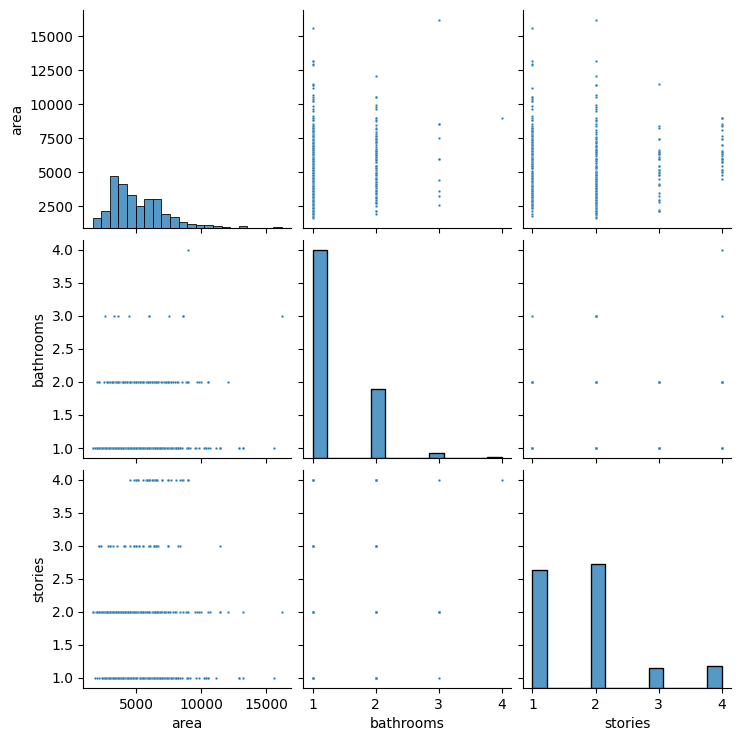

In [16]:
sns.pairplot(house_df[['area','bathrooms','stories']], plot_kws={"s": 3});

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(house_df[['area','bathrooms','stories']])
princ_comp = pca.transform(house_df[['area','bathrooms','stories']])

In [18]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(house_df[['area','bathrooms','stories']])
house_df['combination'] = pca.transform(house_df.loc[:, ('area','bathrooms','stories')]).flatten()
house_df.drop(['area','bathrooms','stories'], axis=1, inplace=True)

In [20]:
house_df.head()

,price,bedrooms,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,combination
0,13300000,4,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,2269.458784
1,12250000,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,3809.458905
2,12250000,3,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,4809.458747
3,12215000,4,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,2349.458750
4,11410000,4,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,2269.458706


### 3.3 Train-Test Split

Divide the dataset into training data and test data with a ratio of 9:1.

In [21]:
from sklearn.model_selection import train_test_split

X = house_df.drop(["price"],axis =1)
y = house_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [22]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 545
Total # of sample in train dataset: 490
Total # of sample in test dataset: 55


### 3.4 Standardization

Standardize to ensure all variables have a uniform scale.

In [23]:
columns_to_remove = ['area', 'bathrooms', 'stories', 'price']
house_numerical_features_filtered = [col for col in house_numerical_features if col not in columns_to_remove]
house_numerical_features_filtered.append('combination')
print(house_numerical_features_filtered)

['bedrooms', 'parking', 'combination']


In [24]:
from sklearn.preprocessing import StandardScaler

numerical_features = house_numerical_features_filtered
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bedrooms,parking,combination
252,0.046531,-0.810004,2.150729
514,0.046531,-0.810004,-0.990185
34,2.728886,0.353931,0.767994
295,0.046531,-0.810004,-1.299240
33,0.046531,0.353931,0.365078


In [25]:
X_train[numerical_features].describe().round(4)

,bedrooms,parking,combination
count,490.0000,490.0000,490.0000
mean,0.0000,-0.0000,-0.0000
std,1.0010,1.0010,1.0010
min,-2.6358,-0.8100,-1.6083
25%,-1.2946,-0.8100,-0.7155
50%,0.0465,-0.8100,-0.2576
75%,0.0465,0.3539,0.5482
max,4.0701,2.6818,5.0536


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 252 to 510
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         490 non-null    float64
 1   parking                          490 non-null    float64
 2   mainroad_no                      490 non-null    uint8  
 3   mainroad_yes                     490 non-null    uint8  
 4   guestroom_no                     490 non-null    uint8  
 5   guestroom_yes                    490 non-null    uint8  
 6   basement_no                      490 non-null    uint8  
 7   basement_yes                     490 non-null    uint8  
 8   hotwaterheating_no               490 non-null    uint8  
 9   hotwaterheating_yes              490 non-null    uint8  
 10  airconditioning_no               490 non-null    uint8  
 11  airconditioning_yes              490 non-null    uint8  
 12  prefarea_no         

## **4. Modeling**

Build a model to calculate house price predictions by comparing various algorithms, namely KNN, Random Forest and Boosting to find the best accuracy results.

In [27]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

### 4.1 KNN Algorithm

Implementing the KNN algorithm.

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### 4.2 Random Forest Algorithm

Implementing the Random Forest algorithm.

In [29]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### 4.3 Boosting Algorithm

Implementing the Boosting algorithm.

In [30]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## **5. Evaluation**

Conduct evaluations to measure model performance using the MSE method.

In [31]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [32]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,1244595259.8275,2195496030.315
RF,236372337.538038,2023060051.054872
Boosting,1413494390.168646,2400655841.045772


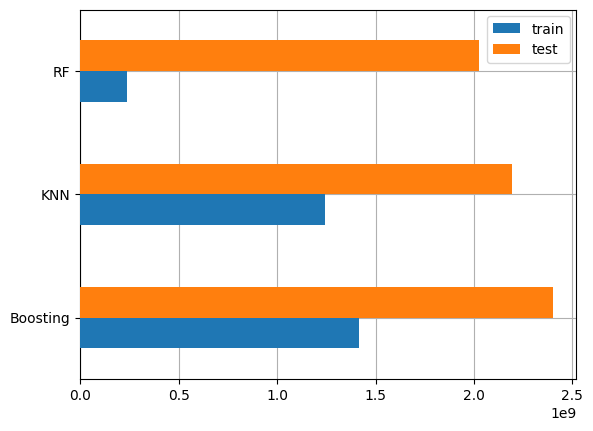

In [33]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## **6. Prediction**

Make predictions by comparing models created with various algorithms.

In [34]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
526,2310000,2726500.0,2905000.0,3103450.0
